<a href="https://colab.research.google.com/github/AkshayBhansali18/Fastai/blob/master/Animal%20Species%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *

In [0]:
from fastai.vision import *

In [0]:
import matplotlib.pyplot as plt

In [0]:
from PIL import Image

In [0]:
path=untar_data(URLs.PETS)

In [0]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls


<bound method <lambda> of PosixPath('/root/.fastai/data/oxford-iiit-pet')>

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_image=path/'images'
path_anno=path/'annotaions'

In [0]:
fnames=get_image_files(path_image)

In [0]:
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_142.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_31.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_66.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_157.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_74.jpg')]

In [0]:
np.random.seed(2)
pat=r'/([^/]+)_\d+.jpg$'

In [0]:
data=ImageDataBunch.from_name_re(path_image,fnames,pat,valid_pct=0.2,size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bengal,pomeranian,german_shorthaired,basset_hound,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
British_Shorthair,Russian_Blue,basset_hound,scottish_terrier,boxer
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

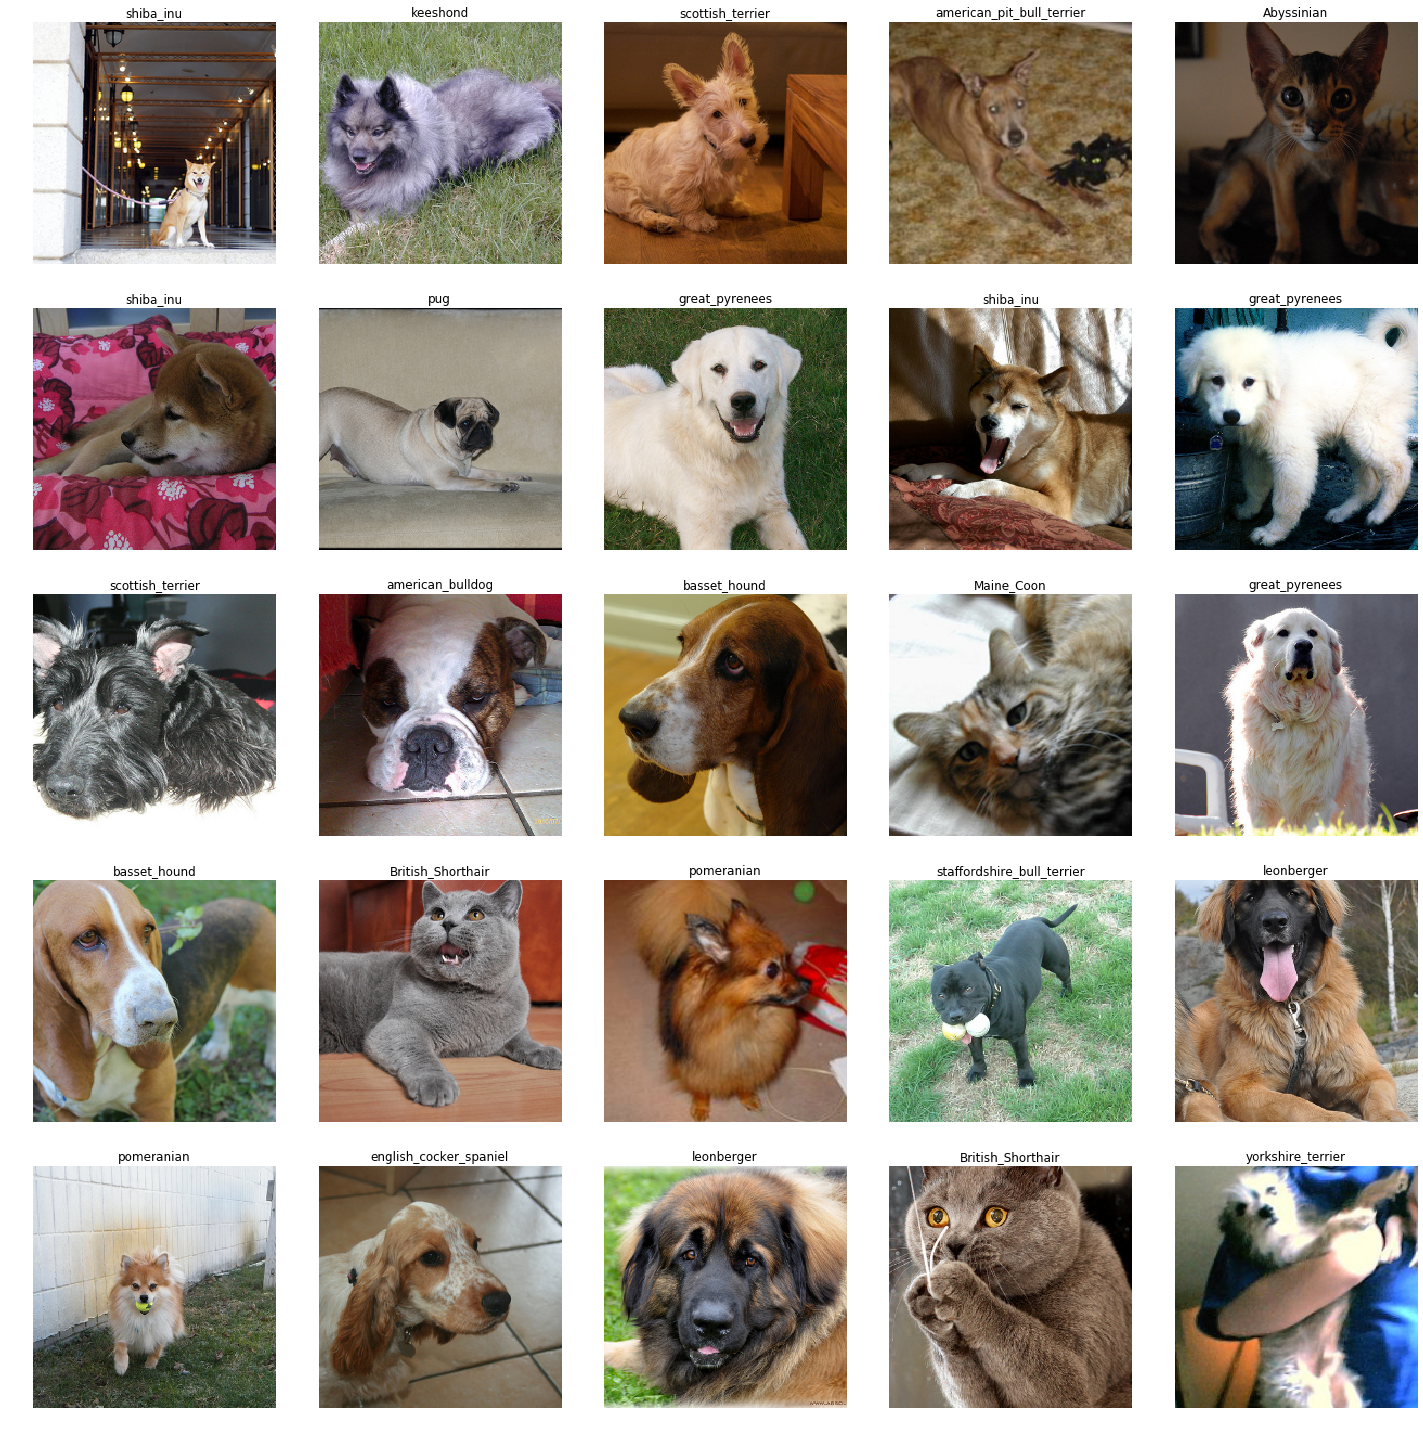

In [0]:
data.show_batch(rows=5)

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 44852890.64it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.340844,0.330651,0.899188,01:01
1,0.499771,0.258771,0.916779,01:01
2,0.270977,0.239853,0.922192,01:01
3,0.174810,0.221568,0.927605,01:00


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


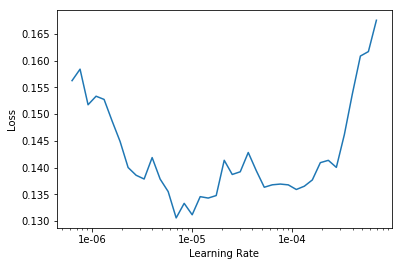

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2,slice(1e-06,1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.064120,0.201135,0.936401,01:03
1,0.052334,0.193937,0.937754,01:03


In [0]:
learn=ClassificationInterpretation.from_learner(learn)

In [0]:
learn.most_confused(min_val=2)

[('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('Maine_Coon', 'Persian', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('basset_hound', 'beagle', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Bengal', 'Abyssinian', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Siamese', 'Birman', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('newfoundland', 'english_cocker_spaniel', 2),
 ('wheaten_terrier', 'scottish_terrier', 2)]